# The interactive plots below will help you visualize the aliasing concept in both terms of the Nyquist Frequency and the Nyquist Wavelength.

## Wavelength

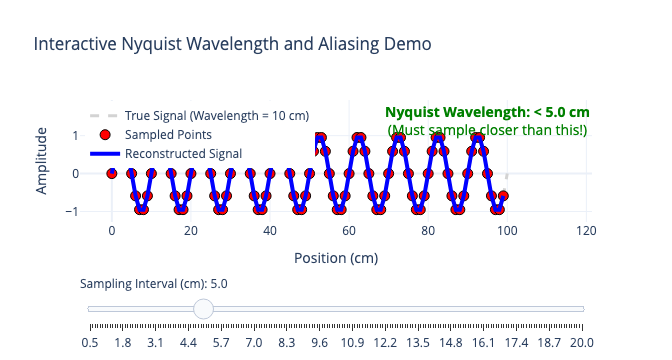

In [6]:
import numpy as np
import plotly.graph_objects as go

# --- 1. Define the "True" Spatial Signal ---
signal_wavelength = 10  # The wavelength of our original signal in cm
L = 100                 # Total length to display in cm

# Create a high-resolution representation of the "continuous" spatial signal
position_continuous = np.linspace(0, L, 1000)
signal_continuous = np.sin(2 * np.pi / signal_wavelength * position_continuous)

# --- 2. Define the Nyquist Wavelength ---
# To perfectly reconstruct the signal, we must sample at an interval
# smaller than half of the signal's wavelength.
nyquist_wavelength = signal_wavelength / 2

# --- 3. Create the Interactive Plotly Figure ---
fig = go.Figure()

# Add the "true" signal as a faint gray line
fig.add_trace(go.Scatter(
    x=position_continuous,
    y=signal_continuous,
    mode='lines',
    line=dict(color='lightgray', width=3, dash='dash'),
    name=f'True Signal (Wavelength = {signal_wavelength} cm)'
))

# --- 4. Add the Dynamic Traces for Sampling and Reconstruction ---
# Initialize with a small, effective sampling interval
initial_sampling_interval = 1.0
position_sampled = np.arange(0, L, initial_sampling_interval)
signal_sampled = np.sin(2 * np.pi / signal_wavelength * position_sampled)

# Add the sampled points (the red dots)
fig.add_trace(go.Scatter(
    x=position_sampled,
    y=signal_sampled,
    mode='markers',
    marker=dict(color='red', size=10, line=dict(width=1, color='black')),
    name='Sampled Points'
))

# Add the reconstructed signal (the blue line connecting the dots)
fig.add_trace(go.Scatter(
    x=position_sampled,
    y=signal_sampled,
    mode='lines',
    line=dict(color='blue', width=4),
    name='Reconstructed Signal'
))

# --- 5. Create the Slider ---
steps = []
# Create slider steps for sampling intervals from 0.5 cm to 20 cm
for s_interval in np.arange(0.5, 20.1, 0.1):
    # Calculate the new sampled points and signal for this interval
    x_step = np.arange(0, L, s_interval)
    y_step = np.sin(2 * np.pi / signal_wavelength * x_step)
    
    step = dict(
        method="restyle",
        args=[
            {"x": [x_step, x_step], "y": [y_step, y_step]},
            [1, 2] # Indices of the traces to update (points and line)
        ],
        label=f"{s_interval:.1f}"
    )
    steps.append(step)

sliders = [dict(
    # Find the index for the initial 'active' value (e.g., 5.0 cm)
    active=[step['label'] for step in steps].index('5.0'),
    currentvalue={"prefix": "Sampling Interval (cm): "},
    pad={"t": 50},
    steps=steps
)]

# --- 6. Update Layout, Add Annotations, and Show the Figure ---
fig.update_layout(
    sliders=sliders,
    title_text='Interactive Nyquist Wavelength and Aliasing Demo',
    xaxis_title='Position (cm)',
    yaxis_title='Amplitude',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    annotations=[dict(
        x=95, y=1.4, xref='x', yref='y',
        text=f"<b>Nyquist Wavelength: < {nyquist_wavelength} cm</b><br>(Must sample closer than this!)",
        showarrow=False, font=dict(size=14, color="green")
    )]
)

fig.show()

## Frequency

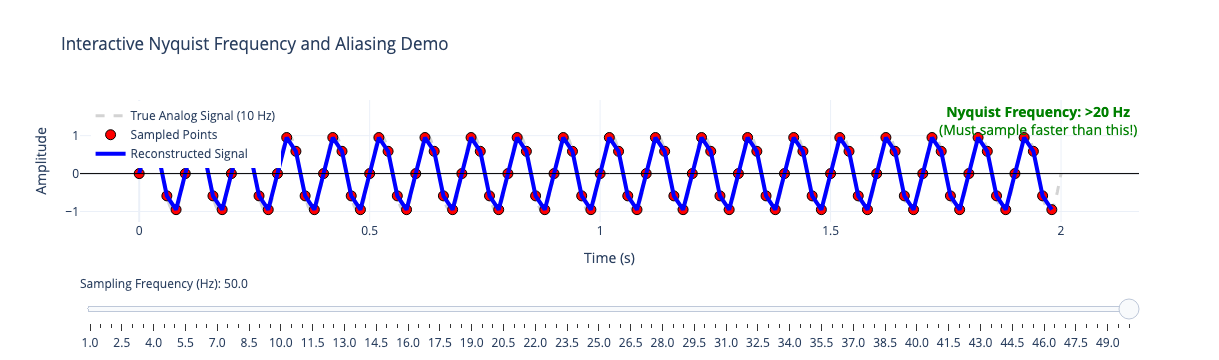

In [14]:
import numpy as np
import plotly.graph_objects as go

# --- 1. Define the "True" Analog Signal ---
signal_freq = 10  # The frequency of our original signal in Hz
T = 2             # Total time to display in seconds

# Create a high-resolution representation of the "continuous" analog signal
# This is what the signal *actually* looks like in the real world.
time_continuous = np.linspace(0, T, 1000)
signal_continuous = np.sin(2 * np.pi * signal_freq * time_continuous)

# --- 2. Define the Nyquist Frequency ---
# To perfectly reconstruct the signal, we must sample at more than twice its frequency.
nyquist_freq = 2 * signal_freq

# --- 3. Create the Interactive Plotly Figure ---
fig = go.Figure()

# Add the "true" analog signal as a faint gray line
fig.add_trace(go.Scatter(
    x=time_continuous,
    y=signal_continuous,
    mode='lines',
    line=dict(color='lightgray', width=3, dash='dash'),
    name='True Analog Signal (10 Hz)'
))

# --- 4. Add the Dynamic Traces for Sampling and Reconstruction ---
# These are the plot elements that the slider will update.
# We initialize them with a default sampling frequency of 50 Hz.
initial_sampling_freq = 50.0
time_sampled = np.arange(0, T, 1/initial_sampling_freq)
signal_sampled = np.sin(2 * np.pi * signal_freq * time_sampled)

# Add the sampled points (the red dots)
fig.add_trace(go.Scatter(
    x=time_sampled,
    y=signal_sampled,
    mode='markers',
    marker=dict(color='red', size=10, line=dict(width=1, color='black')),
    name='Sampled Points'
))

# Add the reconstructed signal (the blue line connecting the dots)
fig.add_trace(go.Scatter(
    x=time_sampled,
    y=signal_sampled,
    mode='lines',
    line=dict(color='blue', width=4),
    name='Reconstructed Signal'
))

# --- 5. Create the Slider ---
steps = []
# Create slider steps for sampling frequencies from 1 Hz to 50 Hz
for f_sample in np.arange(1.0, 50.5, 0.5):
    # Calculate the new sampled points and signal for this frequency
    t_step = np.arange(0, T, 1/f_sample)
    s_step = np.sin(2 * np.pi * signal_freq * t_step)
    
    step = dict(
        method="restyle",
        args=[
            {"x": [t_step, t_step], "y": [s_step, s_step]},
            [1, 2] # Indices of the traces to update (sampled points and reconstructed line)
        ],
        label=f"{f_sample:.1f}"
    )
    steps.append(step)

sliders = [dict(
    active=len(steps)-1, # Start the slider at the highest frequency
    currentvalue={"prefix": "Sampling Frequency (Hz): "},
    pad={"t": 50},
    steps=steps
)]

# --- 6. Update Layout, Add Annotations, and Show the Figure ---
fig.update_layout(
    sliders=sliders,
    title_text='Interactive Nyquist Frequency and Aliasing Demo',
    xaxis_title='Time (s)',
    yaxis_title='Amplitude',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99),
    # Add a horizontal line and annotation for the Nyquist Frequency
    shapes=[dict(
        type='line', xref='paper', x0=0, x1=1, y0=0, y1=0,
        line=dict(color='black', width=1)
    )],
    annotations=[dict(
        x=1.95, y=1.4, xref='x', yref='y',
        text=f"<b>Nyquist Frequency: >{nyquist_freq} Hz</b><br>(Must sample faster than this!)",
        showarrow=False, font=dict(size=14, color="green")
    )]
)

fig.show()